<a href="https://colab.research.google.com/github/alisonands/CryptoClustering/blob/main/CryptoClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Issues: Cannot use hvplot (need to make hover points)

# Clustering crypto stock data

## Data exploration

In [7]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
# import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
# data
data = pd.read_csv('crypto_market_data.csv')
data.set_index('coin_id', inplace = True)     #set index to coin id
data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [9]:
# Scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.set_index(data.index, inplace = True)
scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [10]:
# summary
scaled_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


<Axes: xlabel='coin_id'>

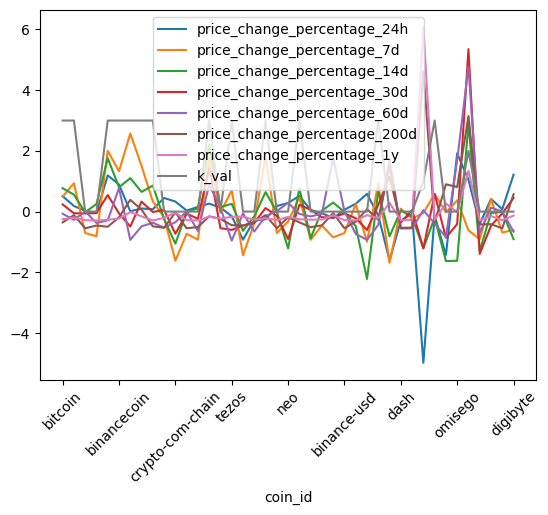

In [26]:
# Plot scaled data
scaled_data.plot(rot = 45)

### Find the best k value using the scaled data
- Using KMeans clustering and it's inertia to determine the best value for the number of clusters.

In [ ]:
# Finding inertia values
k_val_list = list(range(1,11))
inertia = []
for i in k_val_list:
  k_model = KMeans(n_clusters = i)
  k_model.fit(scaled_data)
  inertia.append(k_model.inertia_)


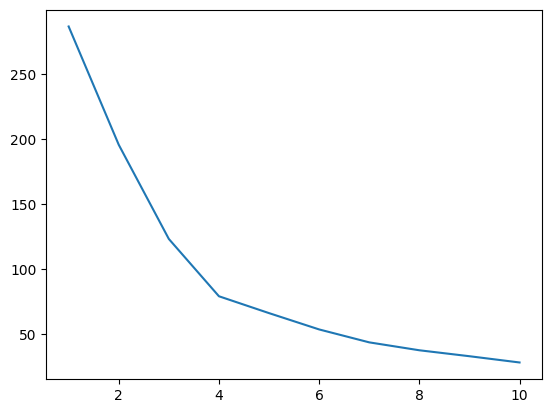

In [13]:
# Plotting inertia values
plt.plot(k_val_list, inertia)

The best value for the number of clusters is n=4.

### Clustering Cryptocurrencies with n=4.

In [ ]:
# Training the KMeans model on 4 clusters
model = KMeans(n_clusters=4)
model.fit(scaled_data)
y_pred = model.predict(scaled_data)

In [28]:
scaled_data['k_val'] = y_pred
scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_val
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [ ]:
plt.scatter(scaled_data['price_change_percentage_24h'], scaled_data['price_change_percentage_7d'], c = scaled_data['k_val'])
plt.title('K-Means predictions with n_clusters = 4')

<Axes: title={'center': 'K-Means predictions with n_clusters = 4, for scaled data'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

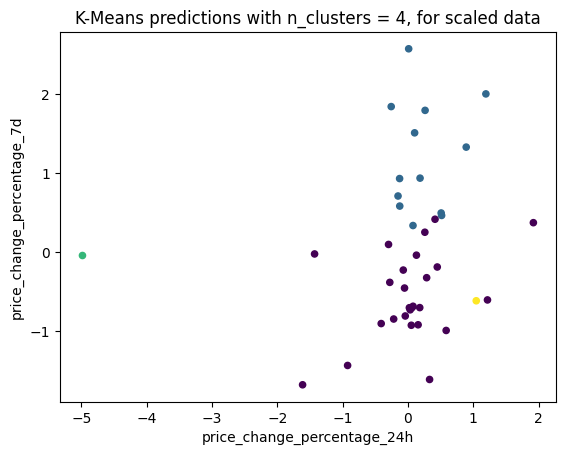

In [31]:
scaled_data.plot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = scaled_data['k_val'].values.tolist(),
    title = 'K-Means predictions with n_clusters = 4, for scaled data'
)


### Optimizing clusters with PCA

In [32]:
# initializing the pca model
pca = PCA(n_components = 3)

In [33]:
# reducing the variables with pca
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=[['PC1', 'PC2', 'PC3']])
pca_df.head()

,PC1,PC2,PC3
0,0.102716,-1.092940,0.535184
1,0.076712,-0.704779,1.036855
2,-0.619999,-0.019769,-0.654034
3,-0.664725,0.002174,-0.485221
4,0.288739,-2.437009,1.799157


In [34]:
pca.explained_variance_ratio_
print (f'the total explained variance of the three principle components is {pca.explained_variance_ratio_.sum()}')

the total explained variance of the three principle components is 0.8918896809358546


### Find the best value for k using the PCA data

In [ ]:
# Loop through the pca dataframe to find best k values
k_val_list_pca = list(range(1, 11))
inertia_pca = []
for i in k_val_list_pca:
  k_model = KMeans(n_clusters=i)
  k_model.fit(pca_df)
  inertia_pca.append(k_model.inertia_)

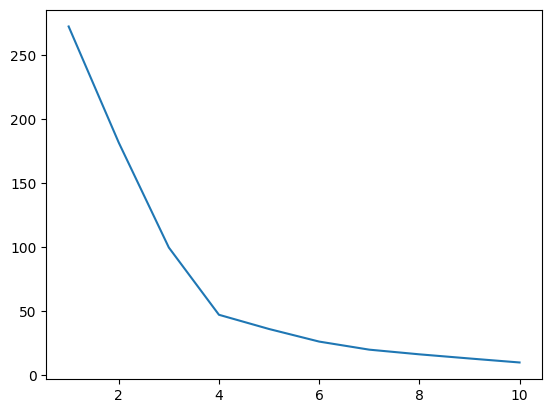

In [55]:
plt.plot(k_val_list_pca, inertia_pca)

The best value for k using PCA is 4. This does not change from finding the k value from the scaled original data.

In [ ]:
# Predicting pca dataframe to kmeans
model = KMeans(n_clusters=4)
model.fit(pca_df)
y_pred = model.predict(pca_df)

In [41]:
# Predicted k values for pca dataframe
final_pca_df = pca_df.copy()
final_pca_df['k_val'] = y_pred
final_pca_df.set_index(scaled_data.index, inplace = True)
final_pca_df.head()

,PC1,PC2,PC3,k_val
coin_id,,,,
bitcoin,0.102716,-1.092940,0.535184,1
ethereum,0.076712,-0.704779,1.036855,1
tether,-0.619999,-0.019769,-0.654034,0
ripple,-0.664725,0.002174,-0.485221,0
bitcoin-cash,0.288739,-2.437009,1.799157,1


<Axes: xlabel='PC1', ylabel='PC2'>

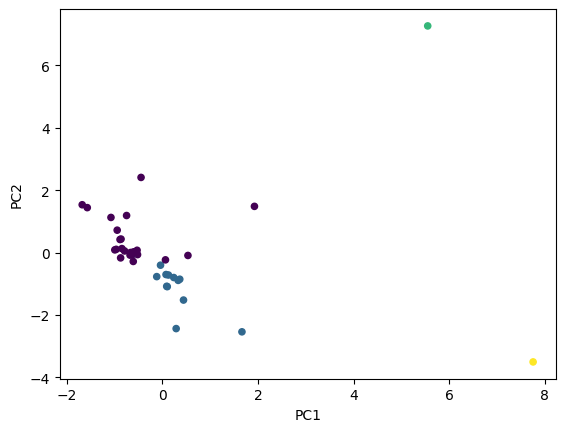

In [42]:
# Plotting pca dataframe k values with PC1 and PC2
final_pca_df.plot.scatter(
    x = 'PC1',
    y = 'PC2',
    c = final_pca_df['k_val'].values.tolist()
)


Text(0, 0.5, 'Inertia')

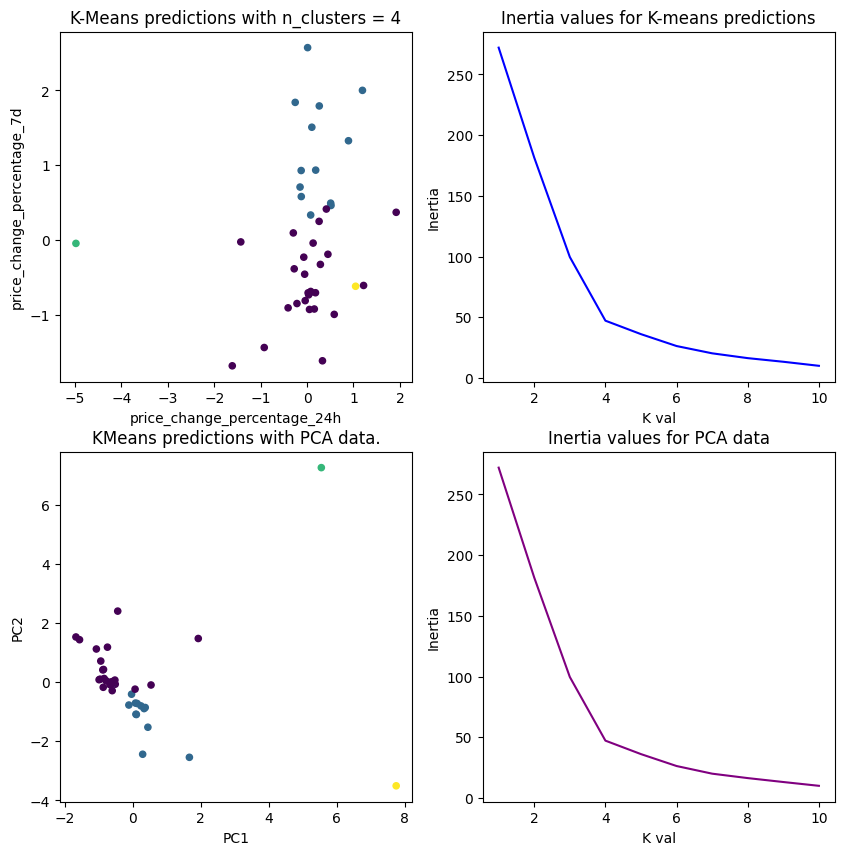

In [60]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

fig.set_figheight(10)
fig.set_figwidth(10)

scaled_data.plot.scatter(ax = axes[0, 0],
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = scaled_data['k_val'].values.tolist(),
    title = 'K-Means predictions with n_clusters = 4'
)

final_pca_df.plot.scatter(ax = axes[1, 0],
    x = 'PC1',
    y = 'PC2',
    c = final_pca_df['k_val'].values.tolist(),
    title = 'KMeans predictions with PCA data.'
)

axes[0, 1].plot(
    k_val_list,
    inertia,
    color = 'blue'
)
axes[0, 1].set_title('Inertia values for K-means predictions')
axes[0, 1].set_xlabel('K val')
axes[0, 1].set_ylabel('Inertia')

axes[1, 1].plot(
    k_val_list_pca,
    inertia_pca,
    color = 'purple',
)
axes[1, 1].set_title('Inertia values for PCA data')
axes[1, 1].set_xlabel('K val')
axes[1, 1].set_ylabel('Inertia')



After analyzing the results, using fewer clusters show that the PCA model groups the data more effectively, from a visual analysis. The number of clusters do not change, however, it is more effective in clustering the data.